# Homework 4: More Simulation and the Central Limit Theorem 
***

**Name**: Sam Cuthbertson

**Section**: 001
***

This assignment is due on Moodle by **5pm on Friday October 27th**. Your solutions to theoretical questions should be done in Markdown/MathJax directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your instructors and classmates, but **you must write all code and solutions on your own**.  For a refresher on the course **Collaboration Policy** click [here](https://github.com/chrisketelsen/csci3022/blob/master/resources/syllabus.md#collaboration-policy).  

**NOTES**: 

- Do **NOT** load or use any Python packages that are not available in Anaconda 3.6. 
- Some problems with code may be autograded.  If we provide a function API **do not** change it.  If we do not provide a function API then you're free to structure your code however you like. 
- Because you can technically evaluate notebook cells is a non-linear order, it's a good idea to do Cell $\rightarrow$ Run All as a check before submitting your solutions.  That way if we need to run your code you will know that it will work as expected. 
- Submit only this Jupyter notebook to Moodle.  Do not compress it using tar, rar, zip, etc. 

In [9]:
import numpy as np
import matplotlib.pylab as plt
import pandas as pd
from scipy.stats import norm
%matplotlib inline

### [35 points] Problem 1 - Monte Carlo Estimation of Definite Integrals 
***

One really cool application of random variables is using them to approximate integrals/area under a curve.  This method of approximating integrals is used constantly in computational science to approximate really difficult integrals that we never want to do by hand.  In this exercise you'll figure out how we can do this in practice and test your method on a very simple integral. 

**Part A** Compute by-hand, the integral $f(x) = \sin(x)$ for $0 \leq x \leq \pi$.

$$
\begin{align*}
        \int_0^\pi sin(x) &= -cos(x) \big\rvert_0^\pi \\
            &= -(-1) + -(-1) \\
            &= \mathbf{2}
\end{align*}
$$

**Part B**: Suppose we sample a random variable $X$ from $U(0,\pi)$ and another random variable $Y$ from $U(0,1)$ and think of them as $x$- and $y$-coordinates of a point in the box $[0,\pi] \times [0,1]$.  If we compute the ratio of points that fall under the curve $f(x)$ to the total points sampled, what does this value estimate? 

** That would be the percentage the area in $[0,\pi] \times [0,1]$ which falls under $f(x)$. **

**Part C**: How could we modify the process outlined in **Part B** so that our estimator estimates the value of the desired integral? 

** If we multiplied the percentage from part B by the total area in $[0,\pi] \times [0,1]$, we would have the area under $f(x)$ in that interval, which is the desired value. **

**Part C** Write a function integrate that takes as arguments the number of points to sample and a boolean flag isPlot and approximates the definite integral of $f(x)$ from $0$ to $1$ by sampling $X$ from $U(0,\pi)$ and $Y$ from $U(0,1)$. Your function should perform 3 tasks: 

1. Return the estimate of the value of the integral. 
2. Return the sample variance of the random variable being simulated using the np.var function.  
4. If isPlot is True, plot the curve $f(x)$ as well as the location of the points $(X,Y)$, colored according to whether they fall above or below the curve. 

Run your simulation with isPlot=True for $1K$ samples so we can see your plot. Then, run your simulation (with the isPlot=False) with at least $10K$ samples and estimate the value of the given integral.  Does your estimate agree with the exact value of the integral you computed in **Part A**? 

Estimated value after 1e6 trials: 1.99939 
Estimated Variance after 1e6 Trials: 2.28370


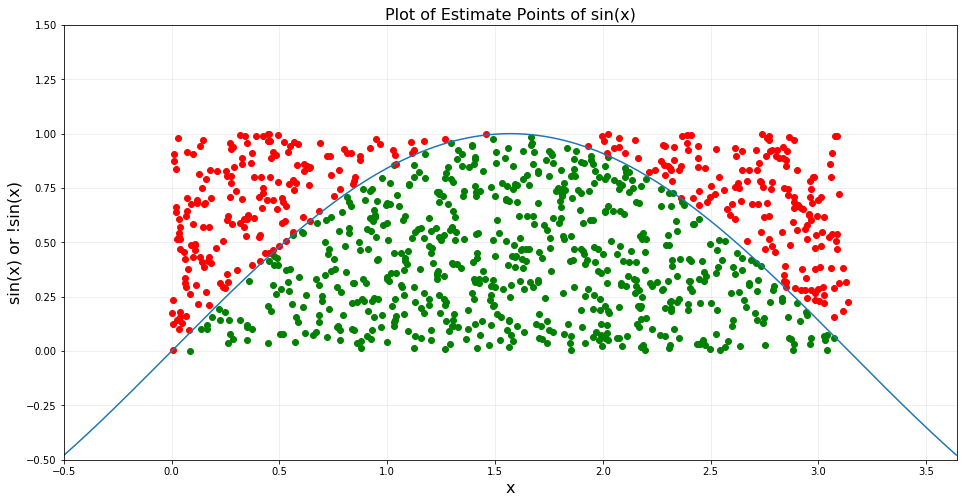

In [10]:
def integrate(num_samples=int(1e4), isPlot=False):
    counter = np.zeros(num_samples)
    
    if(isPlot):
        fig, ax = plt.subplots(figsize=(16,8))
        ax.set_xlim(-.5, np.pi+.5)
        ax.set_ylim(-.5, 1.5)
        ax.grid(alpha=0.25)
        ax.set_axisbelow(True)
        ax.set_title("Plot of Estimate Points of sin(x)", fontsize=16)
        ax.set_xlabel("x", fontsize=16)
        ax.set_ylabel("sin(x) or !sin(x)", fontsize=16);
    
    for ii in range(num_samples):
        x = np.random.uniform(0, np.pi)
        y = np.random.uniform(0, 1)
        if(y <= np.sin(x)):        
            counter[ii] = 1
            if(isPlot):
                plt.scatter(x, y, c='g')
        else:
            if(isPlot):
                plt.scatter(x, y, c='r')
        

        
    if(isPlot):
        t = np.arange(-0.5, np.pi+0.5, 0.01)
        ax.plot(t, np.sin(t))
    
    counter *= np.pi
    sample_var = np.var(counter) 
    return np.mean(counter), sample_var 

integrate(int(1e3), True)
(value, var) = integrate(int(1e6), False)
print("Estimated value after 1e6 trials: {0:1.5f} \nEstimated Variance after 1e6 Trials: {1:1.5f}".format(value, var))

**Part D**: In the simulation above, what is distribution of the random variable we're actually sampling and what is/are its parameters?  

** $\pi$*Bernoulli(p), with probability being the odds of a point falling below sin(x): $p = \big( \frac{2}{\pi} \big)$**

**Part E**: Compute the expected value of the random variable you described in **Part D** by hand.  Does this value agree with the exact value of the integral you computed in **Part A** and the estimated value you computed in **Part C**? 

$$
\begin{align*}
E[\pi * Bernoulli(\frac{2}{\pi})] &= \pi * \frac{2}{\pi} \\
        &= \mathbf{2}
\end{align*}
$$

**This agrees with the simulated result. **

**Part F**: Compute the variance of the random variable you described in **Part D** by hand.  Does this value agree with the sample variance observed in **Part C**? 

$$
\begin{align*}
Var[\pi * Bernoulli(\frac{2}{\pi})] &= \pi^2 * Var[Bernoulli(\frac{2}{\pi})] \\
        &= \pi^2 * \frac{2}{\pi} \big( 1 - \frac{2}{\pi} \big) \\ 
        &= 2\pi - 4 \\
        &\approx \mathbf{2.28} 
\end{align*}
$$

**This agrees with the simulated result.**

### [25 points] Problem 2 - Sampling Freshies
***

Ralphie the buffalo stands alone in a field. Snow has come to Colorado and flakes collect on her majestic horns and beard. She shivers them off not because she is cold but just because her buffalo reflexes have been honed by millenia of adaptation. She is a biological machine. An inspiration. 

She wanders into her barn-mansion, hungry. There is hay from the autumn harvest. This is no ordinary hay, of course. It must be inspected with statistical care so that it is with high probability of the finest quality. You see, Ralphie's hay has a freshness score, measured in Freshies, named after Hayward Freshmann. The average piece of hay from her current supplier is 91 Freshies, and the standard deviation is 6 Freshies. 

You are new on the job, excited to apply your CSCI 3022 knowledge, and keen to prove yourself in a big and changing world. You are in charge of sampling the hay. Your boss, Governor John Hickenlooper, tells you that you must take a sample of hay and that the average freshness must be no less than 90 Freshies. If the average is below 90 Freshies, the bale of hay must be thrown away, rejected. The current system, when you arrive is to sample 30 pieces of hay from each bale to see if the average freshness is above the 90 Freshies threshold. 

**Part A**:  Say "Freshies Threshold" at least 10 times in a row, as quickly as possible. Do not show your work. 



** Done. **

**Part B**: What is the probability that a bale of hay is rejected under the current system of 30 samples?

**Since our sample size is n = 30, where $n \geq 30$, we can use the central limit therorum and state that:**

$$
\overline{X} \sim N\big(\mu, \frac{\sigma^2}{n}\big)
$$

** Where here we have $\mu = 91$ and $\sigma = 6$ from above. The probability that a bale of hay is rejected is then given by: **

In [11]:
norm.cdf(90, loc=91, scale=((6**2)/30))

0.20232838096364308

**Or about 20.2%**

**Part C**: Well, that's not good enough. Not for our Ralphie. You propose to Governor Hickelooper that you will get hay from a new supplier. The new supplier's hay has a standard deviation of 6 Freshies, just like the old one. But, they can harvest the hay from various parts of the field, to adjust the average Freshy level of the hay, $\mu$. Gov. Hickenlooper's requirement is that the probability that a bale of hay is rejected is less than 0.001. What is the minimum average Freshy level $\mu$ needed in order to achieve the Governor's requirement?


In [12]:
for i in range(91, 95):
    print(i, norm.cdf(90, loc=i, scale=((6**2)/30)))

91 0.202328380964
92 0.0477903522728
93 0.00620966532578
94 0.000429060333197


**Evidently the minimum Freshy level ($\mu$) is 94.**

**Part D**: You are about to submit your report, given your answer above, when you find out that the new supplier is going out of business. Ugh.  You are stuck with the old hay. But the Governor's requirement still stands: the probability that a bale of hay is rejected must be less than 0.001. You decide you'll just take more samples from the existing bales of hay. Surely, the number must be greater than 30, but... what is the minimum number of samples that will ensure that each bale of hay is rejected with probability less than $0.001$?


In [13]:
for i in range(110, 113):
    print(i, norm.cdf(90, loc=91, scale=((6**2)/i)))

110 0.0011232199025
111 0.00102347866429
112 0.000931923967515


**[Extra Credt - 2 points] Part E**: Draw an ASCII picture of Ralphie. 

 


```
                 __
               / 00 \
            /          \
         /                \
      /                      \
   /                            \
/__________________________________\
|              __     __   _       |
|    _______ _/ /__  / /  (_)__    |
|   / _ / _ `/ / _ \/ _ \/ / -_)   |
|  /_/  \_,_/_/ .__/_//_/_/\__/    |
|            /_/                   |
|__________________________________|    


```


### [40 points] Problem 3 - Not-so-Easy Peasy Plinko 
***

[Plinko](http://priceisright.wikia.com/wiki/Plinko), the shining jewel of the gameshow [Price is Right](https://en.wikipedia.org/wiki/The_Price_Is_Right), is a staple of American culture.  Luckily for us, it's also chalk-full of interesting ideas from probability and statistics. The game involves dropping a disc onto an inclined board of pegs and letting it bounce around until it lands in a bin with an associated cash value. Players get to drop some number of discs down the Plinko board and keep their winnings.   

In class we looked at a [simplified version of Plinko](https://github.com/chrisketelsen/csci3022/blob/master/inclass-notebooks/lecture11solutions.ipynb):  

![alt text](https://www.cs.colorado.edu/~ketelsen/files/courses/csci3022/figs/plinko1.png)


In real life, Plinko has boundaries, positioned symmetrically around the center $c$ at positions $\ell$ and $r$ s.t. $|c-\ell| = |c+r|$. The effect of the boundaries are that when the Plinko disc hits the boundary, it can only move back toward the center. In other words, if the disc hits the boundary at $\ell$, it can only go right at that level. Likewise, if the disc hits the boundary at $r$, it can only go left at that level. 

For instance, the following board depicts a Plinko game with boundaries at $0.5$ (halfway between the centers of Buckets 0 and 1) and $5.5$ (halfway between Buckets 5 and 6)  The red pegs indicate boundary pegs on which the disc always moves toward the center.   

![alt text](https://www.cs.colorado.edu/~ketelsen/files/courses/csci3022/figs/plinko2.png)


**Part A**: Write a simulator of Plinko that models the disc moving through each of the 6 rows of pegs to its final destination in one of the 7 bins. Let $X$ be the random variable corresponding to the Bucket that the disc lands in. Run your simulation for at least $10K$ trials and plot a density histogram estimate of the PMF of $X$ when the probability of moving left or right when hitting a peg is equal to $p = 0.5$. 

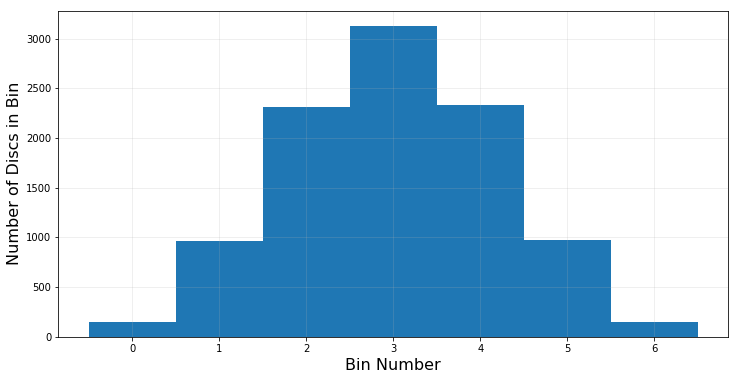

In [14]:
def plinko_trial(num_rows=6, p=0.5):
    bucket = 3
    for ii in range(num_rows):
        bucket += np.random.choice([-0.5,0.5], p=[1-p, p])
    return bucket

def plinko_sim(num_trials=int(1e4)):
    bucket = np.zeros(num_trials)
    for ii in range(num_trials):
        bucket[ii] = plinko_trial(6, 0.5)
        
    return bucket
        
distri = plinko_sim()
fig, ax = plt.subplots(figsize=(12,6))
ax.grid(True, alpha=0.25)
plt.ylabel('Number of Discs in Bin',fontsize=16)
plt.xlabel('Bin Number',fontsize=16)
hist, bin_edges = np.histogram(distri, bins = range(8))
plt.bar(bin_edges[:-1], hist, width = 1)
plt.show()

**Part B**: Let $X$ be the random variable corresponding to the Bucket that the disc lands in.  Write down the **true** PMF for $X$. (**Hint**: It might be helpful to reflect back on the discussion from Lecture 11). 

$$
X \propto Binomial(6, 0.5)
$$

**Part C**: Write a simulator for Plinko with boundaries. Your code should be similar to your code from **Part A**, but should take in two variable boundaries, left_bound and right_bound, corresponding to the location of the left boundary and right boundary, respectively. 


In [15]:
def plinko_trial_bounded(left_bound=0, right_bound=6, num_rows=6, p=0.5):
    bucket = num_rows/2
    for ii in range(num_rows):
        bucket += np.random.choice([-0.5,0.5], p=[1-p, p])
        if(bucket < left_bound):
            bucket += 1
        if(bucket > right_bound):
            bucket -= 1
    return bucket

def plinko_sim_bounded(left_bound=0, right_bound=6, num_trials=int(1e4)):
    bucket = np.zeros(num_trials)
    for ii in range(num_trials):
        bucket[ii] = plinko_trial_bounded(left_bound = left_bound, right_bound = right_bound)
        
    return bucket

**Part D**: Consider the board with left_bound $= 0.5$ which looks as follows: 

![alt text](https://www.cs.colorado.edu/~ketelsen/files/courses/csci3022/figs/plinko3.png)

Let $X$ be the random variable corresponding to the Bucket that the disc lands in. Run your simulation for at least $10K$ trials and plot a density histogram estimate of the PMF of $X$. Compare the approximate PMF for this board to the no-boundary board from **Part A**. Explain the mechanism that causes the differences between the two PMFs in words. 




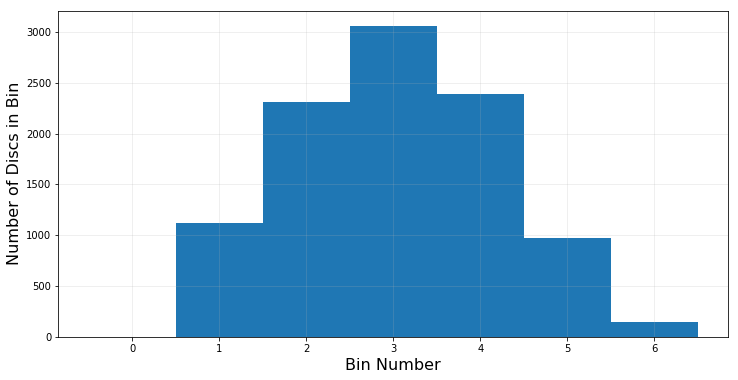

In [16]:
distri = plinko_sim_bounded(left_bound=0.5)
fig, ax = plt.subplots(figsize=(12,6))
ax.grid(True, alpha=0.25)
plt.ylabel('Number of Discs in Bin',fontsize=16)
plt.xlabel('Bin Number',fontsize=16)
hist, bin_edges = np.histogram(distri, bins = range(8))
plt.bar(bin_edges[:-1], hist, width = 1)
plt.show()

**Here, all the discs that would have gone into bin 0 end up in bin 1, leading to the P(X = Bin 1) being the probability of X being either bin 1 or bin 0 from part A.**

**Part E**: Now consider the board with left_bound $= 1.5$ which looks as follows: 

![alt text](https://www.cs.colorado.edu/~ketelsen/files/courses/csci3022/figs/plinko4.png)

Let $X$ be the random variable corresponding to the Bucket that the disc lands in. Run your simulation for at least $10K$ trials and plot a density histogram estimate of the PMF of $X$. Compare the approximate PMF for this board to the boards from **Parts A** and **D**. Explain the mechanism that causes the differences between the three PMFs in words. 


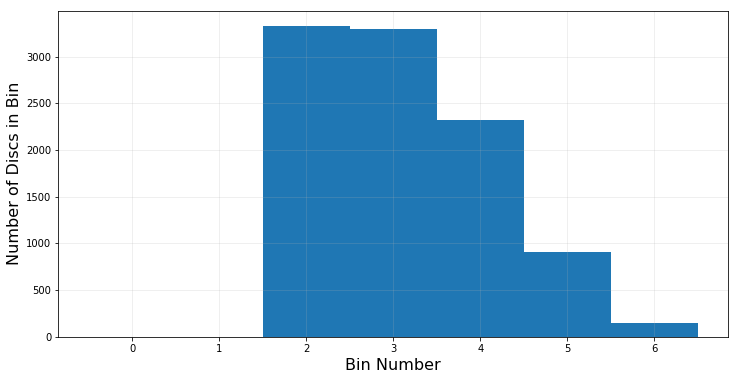

In [17]:
distri = plinko_sim_bounded(left_bound=1.5)
fig, ax = plt.subplots(figsize=(12,6))
ax.grid(True, alpha=0.25)
plt.ylabel('Number of Discs in Bin',fontsize=16)
plt.xlabel('Bin Number',fontsize=16)
hist, bin_edges = np.histogram(distri, bins = range(8))
plt.bar(bin_edges[:-1], hist, width = 1)
plt.show()

**Here, all the discs that would have ended up in either 0 will now end up in either 2 (3/4ths of the time) or 3 (1/4th of the time), as it would need to bounce right twice to end up in 3 (1/2 * 1/2). **

** All the discs that would have ended up in 1 will now end in either bin 2. **

**Part F**: OK, one more. Consider the board with left_bound $= 1.5$ and right_bound $= 5.5$ which looks as follows: 

![alt text](https://www.cs.colorado.edu/~ketelsen/files/courses/csci3022/figs/plinko5.png)

Let $X$ be the random variable corresponding to the Bucket that the disc lands in. Use your observations from **Parts A-D** to write down the **true** PMF of $X$. 




\begin{align*}
P(X = 2) &= \frac{3}{4}Binom(k = 0, 6, 0.5) + Binom(k = 1, 6, 0.5) + Binom(k = 2, 6, 0.5) &&\approx 0.3398 \\
P(X = 3) &= \frac{1}{4}Binom(k = 0, 6, 0.5) + Binom(k = 3, 6, 0.5) &&\approx 0.3164 \\
P(X = 4) &= Binom(k = 4, 6, 0.5) &&\approx 0.2343 \\
P(X = 5) &= Binom(k = 5, 6, 0.5) + Binom(k = 6, 6, 0.5) &&\approx 0.1094\\
\end{align*}

**Part G**: Suppose I challenge you to a _friendly_ game of Plinko on the board from **Part F**. I offer to pay you a dollar amount equal to the bucket that your disc lands in, but also charge you a flat fee for each disc that you play.  How much should I charge you per disc so that we break even in the long run? 

**That optimal charge will be the expected value, which is given by:**

$$
\begin{align*}
E[X] &= 2 * P(X = 2) + 3 * P(X = 3) + 4 * P(X = 4) + 5 * P(X = 5) \\
&\approx 2 * 0.3398 + 3 * 0.3164 + 4 * 0.2343 + 5 * 0.1094 \\
&\approx \mathbf{3.113}
\end{align*}
$$